In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '04e66954c8ff44e994baf9c5a298a7d0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-10-24T12:07:02.729Z', 'error_code': 0, 'error_message': None, 'elapsed': 53, 'credit_count': 1, 'notice': None, 'total_count': 9407}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12445, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
import pandas as pd

pd.set_option('display.max_columns',None)

In [5]:
df = pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12445,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.993916e+07,1.993916e+07,False,NaN,1,NaN,NaN,None,2025-10-24T12:04:00.000Z,111213.542102,5.018015e+10,-27.6951,0.104931,2.128167,5.160153,-1.610683,-0.084010,-5.619120,2.217504e+12,59.2428,2.335484e+12,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
1,1027,Ethereum,ETH,ethereum,10944,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206983e+08,1.206983e+08,True,NaN,2,NaN,NaN,None,2025-10-24T12:05:00.000Z,3953.280897,3.669331e+10,-11.4698,-0.096066,2.891899,4.386155,-5.493187,-13.980694,5.831672,4.771543e+11,12.7476,4.771543e+11,None,2025-10-24T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
2,825,Tether USDt,USDT,tether,154731,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.825044e+11,1.859792e+11,True,NaN,3,NaN,NaN,None,2025-10-24T12:04:00.000Z,1.000068,1.286748e+11,-13.7676,-0.008915,-0.007185,0.014189,-0.012146,0.040299,-0.027755,1.825168e+11,4.8761,1.859919e+11,None,2025-10-24T12:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-24 17:37:06.417439
3,1839,BNB,BNB,bnb,2878,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.391808e+08,1.391799e+08,1.391799e+08,False,NaN,4,NaN,NaN,None,2025-10-24T12:04:00.000Z,1126.431519,5.057701e+09,14.9871,0.036411,3.124230,4.977148,10.660172,31.746520,44.045362,1.567767e+11,4.1884,1.567776e+11,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
4,52,XRP,XRP,xrp,1736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.001728e+10,9.998578e+10,False,NaN,5,NaN,NaN,None,2025-10-24T12:04:00.000Z,2.458751,3.423881e+09,-11.9048,0.365433,3.086479,7.350989,-14.768959,-16.413037,-22.817845,1.475676e+11,3.9424,2.458751e+11,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
5,5426,Solana,SOL,solana,1032,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.494566e+08,6.125679e+08,True,NaN,6,5.252369e+08,1.013138e+11,None,2025-10-24T12:04:00.000Z,192.891667,6.064740e+09,-14.7037,0.591424,2.970250,5.994587,-9.352452,-2.351079,2.726734,1.059856e+11,2.8315,1.181592e+11,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
6,3408,USDC,USDC,usd-coin,33399,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.656155e+10,7.656155e+10,False,NaN,7,6.090122e+10,6.088942e+10,None,2025-10-24T12:04:00.000Z,0.999806,1.574842e+10,-26.7199,0.006318,0.002289,-0.004537,0.001935,0.004785,-0.018658,7.654672e+10,2.0450,7.654672e+10,None,2025-10-24T12:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-24 17:37:06.417439
7,74,Dogecoin,DOGE,dogecoin,1333,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.514828e+11,1.514828e+11,True,NaN,8,NaN,NaN,None,2025-10-24T12:04:00.000Z,0.197563,1.553039e+09,-33.0763,0.422295,2.640190,7.784457,-18.754211,-10.005630,-16.537733,2.992734e+10,0.7995,2.992734e+10,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
8,1958,TRON,TRX,tron,1251,2017-09-13T00:00:00.000Z,"[media, payments, tr

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '04e66954c8ff44e994baf9c5a298a7d0',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df 

    if not os.path.isfile(r'D:\Data Analyst\Pandas\API.csv'):
        df.to_csv(r'D:\Data Analyst\Pandas\API.csv',header = 'column_name')
    else:
        df.to_csv(r'D:\Data Analyst\Pandas\API.csv',mode='a',header=False)

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2025-10-24T12:07:25.447Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9407}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12445, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [9]:
df18 = pd.read_csv(r'D:\Data Analyst\Pandas\API.csv')

In [10]:
df18

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,12445,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.993916e+07,1.993916e+07,False,NaN,1,NaN,NaN,NaN,2025-10-24T11:48:00.000Z,111007.617469,5.037084e+10,-27.6804,-0.196126,1.625160,4.862393,-1.808591,-0.110111,-5.822282,2.213399e+12,59.1981,2.331160e+12,NaN,2025-10-24T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:21:14.377361
1,1,1027,Ethereum,ETH,ethereum,10944,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206983e+08,1.206983e+08,True,NaN,2,NaN,NaN,NaN,2025-10-24T11:48:00.000Z,3945.046185,3.689524e+10,-11.5329,-0.316359,2.055424,4.045665,-5.711299,-14.145145,5.560425,4.761604e+11,12.7351,4.761604e+11,NaN,2025-10-24T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:21:14.377361
2,2,825,Tether USDt,USDT,tether,154723,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.825044e+11,1.859792e+11,True,NaN,3,NaN,NaN,NaN,2025-10-24T11:48:00.000Z,0.999893,1.291688e+11,-13.4795,-0.027733,-0.025998,-0.000878,-0.030524,0.023064,-0.039146,1.824848e+11,4.8806,1.859593e+11,NaN,2025-10-24T11:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-24 17:21:14.377361
3,3,1839,BNB,BNB,bnb,2878,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.391808e+08,1.391799e+08,1.391799e+08,False,NaN,4,NaN,NaN,NaN,2025-10-24T11:48:00.000Z,1126.066977,5.072001e+09,15.1809,0.054139,2.883583,4.541740,11.059618,31.854164,44.202381,1.567259e+11,4.1917,1.567269e+11,NaN,2025-10-24T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:21:14.377361
4,4,52,XRP,XRP,xrp,1736,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.001728e+10,9.998578e+10,False,NaN,5,NaN,NaN,NaN,2025-10-24T11:49:00.000Z,2.446178,3.438916e+09,-11.6364,-0.302797,2.165683,7.058961,-15.077312,-16.858490,-23.147304,1.468129e+11,3.9266,2.446178e+11,NaN,2025-10-24T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:21:14.377361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,10,32196,Hyperliquid,HYPE,hyperliquid,178,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1.000000e+09,3.366852e+08,9.995439e+08,False,NaN,11,3.339317e+08,1.326989e+10,NaN,2025-10-24T12:04:00.000Z,39.738321,4.914720e+08,-27.9345,-0.006467,3.012539,11.843804,-13.697128,-12.883644,-10.381559,1.337931e+10,0.3574,3.973832e+10,NaN,2025-10-24T12:04:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-10-24 17:37:06.417439
266,11,1975,Chainlink,LINK,chainlink,2134,2017-09-20T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'defi', 'inte...",1.000000e+09,6.781000e+08,1.000000e+09,False,NaN,12,NaN,NaN,NaN,2025-10-24T12:04:00.000Z,17.749757,6.528801e+08,-26.5043,0.655637,3.024836,7.085530,-18.541595,-27.774097,-2.755571,1.203611e+10,0.3216,1.774976e+10,NaN,2025-10-24T12:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-10-24 17:37:06.417439
267,12,29470,Ethena USDe,USDe,ethena-usde,236,2024-02-20T11:05:01.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.064762e+10,1.064762e+10,True,NaN,13,NaN,NaN,NaN,2025-10-24T12:04:00.000Z,0.99

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12445,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19939159.00000,19939159.00000,False,NaN,1,NaN,NaN,None,2025-10-24T12:04:00.000Z,111213.54210,50180150800.96078,-27.69510,0.10493,2.12817,5.16015,-1.61068,-0.08401,-5.61912,2217504498932.23096,59.24280,2335484384149.64990,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
1,1027,Ethereum,ETH,ethereum,10944,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120698299.85489,120698299.85489,True,NaN,2,NaN,NaN,None,2025-10-24T12:05:00.000Z,3953.28090,36693312244.55098,-11.46980,-0.09607,2.89190,4.38615,-5.49319,-13.98069,5.83167,477154283088.64069,12.74760,477154283088.64001,None,2025-10-24T12:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
2,825,Tether USDt,USDT,tether,154731,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,182504361789.78693,185979160910.80325,True,NaN,3,NaN,NaN,None,2025-10-24T12:04:00.000Z,1.00007,128674812568.42856,-13.76760,-0.00892,-0.00719,0.01419,-0.01215,0.04030,-0.02775,182516845803.99741,4.87610,185991882614.89999,None,2025-10-24T12:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-10-24 17:37:06.417439
3,1839,BNB,BNB,bnb,2878,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",139180799.97000,139179931.96000,139179931.96000,False,NaN,4,NaN,NaN,None,2025-10-24T12:04:00.000Z,1126.43152,5057700594.14374,14.98710,0.03641,3.12423,4.97715,10.66017,31.74652,44.04536,156776662196.58655,4.18840,156777639950.41000,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
4,52,XRP,XRP,xrp,1736,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60017279517.00000,99985778283.00000,False,NaN,5,NaN,NaN,None,2025-10-24T12:04:00.000Z,2.45875,3423880878.41660,-11.90480,0.36543,3.08648,7.35099,-14.76896,-16.41304,-22.81785,147567572832.34158,3.94240,245875144658.20001,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
5,5426,Solana,SOL,solana,1032,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,549456587.85836,612567868.38827,True,NaN,6,525236893.30000,101313819986.09259,None,2025-10-24T12:04:00.000Z,192.89167,6064740280.93856,-14.70370,0.59142,2.97025,5.99459,-9.35245,-2.35108,2.72673,105985597246.80037,2.83150,118159237362.84000,None,2025-10-24T12:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-10-24 17:37:06.417439
6,3408,USDC,USDC,usd-coin,33399,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76561551147.08836,76561551147.08836,False,NaN,7,60901219650.23000,60889422956.79871,None,2025-10-24T12:04:00.000Z,0.99981,15748422628.95221,-26.71990,0.00632,0.00229,-0.00454,0.00193,0.00479,-0.01866,76546721014.74136,2.04500,76546721014.74001,None,2025-10-24T12:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-10-24 17:37:06.417439
7,74,Dogecoin,DOGE,dogecoin,1333,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,151482756383.70520,151482756383.70526,True,NaN,8,NaN,NaN,None,2025-10-24T12:04:00.000Z,0.19756,1553038576.83049,-33.07630,0.42230,2.64019,7.78446,-18.75421,-10.00563,-16.5377

In [17]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10493,2.12817,5.16015,-1.61068,-0.08401,-5.61912
Ethereum,-0.09607,2.89190,4.38615,-5.49319,-13.98069,5.83167
Tether USDt,-0.00892,-0.00719,0.01419,-0.01215,0.04030,-0.02775
BNB,0.03641,3.12423,4.97715,10.66017,31.74652,44.04536
XRP,0.36543,3.08648,7.35099,-14.76896,-16.41304,-22.81785
Solana,0.59142,2.97025,5.99459,-9.35245,-2.35108,2.72673
USDC,0.00632,0.00229,-0.00454,0.00193,0.00479,-0.01866
Dogecoin,0.42230,2.64019,7.78446,-18.75421,-10.00563,-16.53773
TRON,0.35938,-3.15855,0.31164,-7.60514,-11.44232,-1.95728


In [19]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.10493
              quote.USD.percent_change_24h     2.12817
              quote.USD.percent_change_7d      5.16015
              quote.USD.percent_change_30d    -1.61068
              quote.USD.percent_change_60d    -0.08401
                                                ...   
Bitcoin Cash  quote.USD.percent_change_24h     2.50525
              quote.USD.percent_change_7d      6.07322
              quote.USD.percent_change_30d   -11.61563
              quote.USD.percent_change_60d   -12.18618
              quote.USD.percent_change_90d   -11.20950
Length: 90, dtype: float64

In [20]:
type(df4)

pandas.core.series.Series

In [23]:
df5 = df4.to_frame(name='values')
pd.set_option('display.max_rows', None)
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.10493
             quote.USD.percent_change_24h   2.12817
             quote.USD.percent_change_7d    5.16015
             quote.USD.percent_change_30d  -1.61068
             quote.USD.percent_change_60d  -0.08401
             quote.USD.percent_change_90d  -5.61912
Ethereum     quote.USD.percent_change_1h   -0.09607
             quote.USD.percent_change_24h   2.89190
             quote.USD.percent_change_7d    4.38615
             quote.USD.percent_change_30d  -5.49319
             quote.USD.percent_change_60d -13.98069
             quote.USD.percent_change_90d   5.83167
Tether USDt  quote.USD.percent_change_1h   -0.00892
             quote.USD.percent_change_24h  -0.00719
             quote.USD.percent_change_7d    0.01419
             quote.USD.percent_change_30d  -0.01215
             quote.USD.percent_change_60d   0.04030
             quote.USD.percent_change_90d  -0.02775
BNB          quote.USD.percent_change_1h    0.03641
             quote.USD.percent_change_24h   3.12423
             quote.USD.percent_change_7d    4.97715
             quote.USD.percent_change_30d  10.66017
             quote.USD.percent_change_60d  31.74652
             quote.USD.percent_change_90d  44.04536
XRP          quote.USD.percent_change_1h    0.36543
             quote.USD.percent_change_24h   3.08648
             quote.USD.percent_change_7d    7.35099
             quote.USD.percent_change_30d -14.76896
             quote.USD.percent_change_60d -16.41304
             quote.USD.percent_change_90d -22.81785
Solana       quote.USD.percent_change_1h    0.59142
             quote.USD.percent_change_24h   2.97025
             quote.USD.percent_change_7d    5.99459
             quote.USD.percent_change_30d  -9.35245
             quote.USD.percent_change_60d  -2.35108
             quote.USD.percent_change_90d   2.72673
USDC         quote.USD.percent_change_1h    0.00632
             quote.USD.percent_change_24h   0.00229
             quote.USD.percent_change_7d   -0.00454
             quote.USD.percent_change_30d   0.00193
             quote.USD.percent_change_60d   0.00479
             quote.USD.percent_change_90d  -0.01866
Dogecoin     quote.USD.percent_change_1h    0.42230
             quote.USD.percent_change_24h   2.64019
             quote.USD.percent_change_7d    7.78446
             quote.USD.percent_change_30d -18.75421
             quote.USD.percent_change_60d -10.00563
             quote.USD.percent_change_90d -16.53773
TRON         quote.USD.percent_change_1h    0.35938
             quote.USD.percent_change_24h  -3.15855
             quote.USD.percent_change_7d    0.31164
             quote.USD.percent_change_30d  -7.60514
             quote.USD.percent_change_60d -11.44232
             quote.USD.percent_change_90d  -1.95728
Cardano      quote.USD.percent_change_1h    0.61682
             quote.USD.percent_change_24h   2.77882
             quote.USD.percent_change_7d    5.21917
             quote.USD.percent_change_30d -20.60815
             quote.USD.percent_change_60d -24.76712
             quote.USD.percent_change_90d -20.89744
Hyperliquid  quote.USD.percent_change_1h   -0.00647
             quote.USD.percent_change_24h   3.01254
             quote.USD.percent_change_7d   11.84380
             quote.USD.percent_change_30d -13.69713
             quote.USD.percent_change_60d -12.88364
             quote.USD.percent_change_90d -10.38156
Chainlink    quote.USD.percent_change_1h    0.65564
             quote.USD.percent_change_24h   3.02484
             quote.USD.percent_change_7d    7.08553
             quote.USD.percent_change_30d -18.54160
             quote.USD.percent_change_60d -27.77410
             quote.USD.percent_change_90d  -2.75557
Ethena USDe  quote.USD.percent_change_1h   -0.00778
             quote.USD.percent_change_24h  -0.00600
             quote.USD.percent_change_7d   -0.01030
             quote.USD.percent_change_30d

In [25]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10493
1,Bitcoin,quote.USD.percent_change_24h,2.12817
2,Bitcoin,quote.USD.percent_change_7d,5.16015
3,Bitcoin,quote.USD.percent_change_30d,-1.61068
4,Bitcoin,quote.USD.percent_change_60d,-0.08401
5,Bitcoin,quote.USD.percent_change_90d,-5.61912
6,Ethereum,quote.USD.percent_change_1h,-0.09607
7,Ethereum,quote.USD.percent_change_24h,2.89190
8,Ethereum,quote.USD.percent_change_7d,4.38615
9,Ethereum,quote.USD.percent_change_30d,-5.49319


In [32]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10493
1,Bitcoin,quote.USD.percent_change_24h,2.12817
2,Bitcoin,quote.USD.percent_change_7d,5.16015
3,Bitcoin,quote.USD.percent_change_30d,-1.61068
4,Bitcoin,quote.USD.percent_change_60d,-0.08401
5,Bitcoin,quote.USD.percent_change_90d,-5.61912
6,Ethereum,quote.USD.percent_change_1h,-0.09607
7,Ethereum,quote.USD.percent_change_24h,2.89190
8,Ethereum,quote.USD.percent_change_7d,4.38615
9,Ethereum,quote.USD.percent_change_30d,-5.49319


In [34]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10493
1,Bitcoin,24h,2.12817
2,Bitcoin,7d,5.16015
3,Bitcoin,30d,-1.61068
4,Bitcoin,60d,-0.08401
5,Bitcoin,90d,-5.61912
6,Ethereum,1h,-0.09607
7,Ethereum,24h,2.89190
8,Ethereum,7d,4.38615
9,Ethereum,30d,-5.49319


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


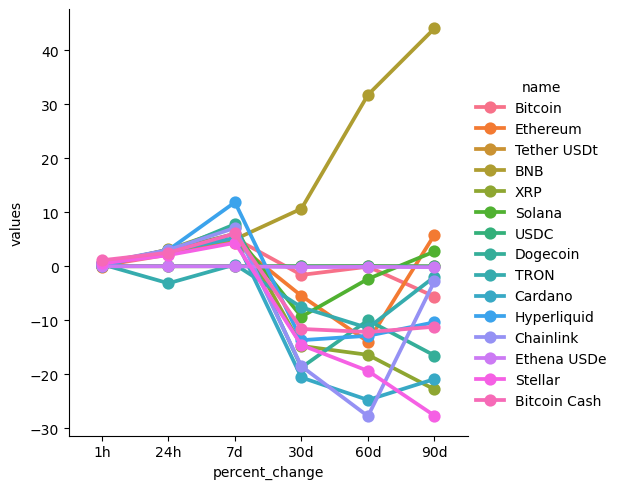

In [36]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [40]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,111213.54210,2025-10-24 17:37:06.417439


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

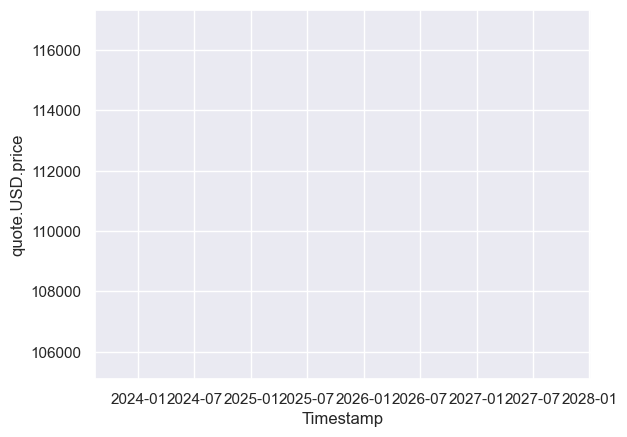

In [42]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)